# Photon Number Estimates

### This notebook calculates the estimated signal of Next-like detectors 

In [1]:
import numpy as np

# Constants in all cases
E_qbb = 2400. # keV
E_kr = 41.5 # keV
dEdx_qbb_blob = 20 # keV/cm
dEdx_qbb_track = 7 # keV/cm
dEdx_kr = 20 # no idea if this is true or not...

In [2]:
def N_i(E, W_i=21.9):
    """
    Returns number of ionization electrons released 
    in a material with an ionization energy of W_i
    with an energy of E.
    
    Input: 
        E - energy in keV
        W_i - ionization energy in eV, default to GXe
    """
    return E*1000./W_i

In [3]:
print('N_i(Qbb) = '+str(int(N_i(E_qbb)))+', N_i(kr) = '+str(int(N_i(E_kr))))

N_i(Qbb) = 109589, N_i(kr) = 1894


In [4]:
def SAF_Plane(r_TP, d_EL, d_A):
    """
    Solid angle fraction of the circular plane a distance 
    d_EL+d_A from the source.
    
    Input: r_TP - radius of tracking plane [mm]
           d_EL - length of EL gap [mm]
           d_A - distance between anode and SiPMs [mm]
    """
    return 2*np.pi * (1/(4*np.pi)) * (1 - ((d_EL+d_A)/2.)/(np.sqrt(r_TP**2. + ((d_EL+d_A)/2.)**2.)))

In [5]:
def SAF_SiPM(s, d_EL, d_A, sipm_width=2.):
    """
    Solid angle fraction of a SiPM on 
    the tracking plane.
    Input: s - size of SiPM [mm]
           d_EL - length of EL gap [mm]
           d_A - distance between anode and SiPMs [mm]
    """
    d = d_EL/2. + d_A - sipm_width
    return SAF_square(s, d)

def SAF_square(s, d):
    """
    Solid angle fraction of square plane a distance
    d from the source
    Reference: https://vixra.org/pdf/2001.0603v1.pdf
    
    Input: s - size of SiPM [mm]
           d - distance [mm]
    """
    num = s**2.
    denom = 4.*d**2. * np.sqrt(1. + 2.*s**2./(4.*d**2.))
    return (1./np.pi) * np.arctan( num / denom)

def SAF_square_approx(s, d):
    """
    Solid angle fraction of square plane, approx for small s 
    a distance d from the source.
    
    Input: s - size of SiPM [mm]
           d - distance from source [mm]
    """
    return s**2. / (4*np.pi*d**2.)

In [6]:
def Coverage(r_TP, s, N_sipms):
    """
    Coverage of tracking plane
    
    Input: r_TP - radius of tracking plane [mm]
           s - size of SiPM [mm]
           N_sipms - number of SiPMs [mm]
    """
    return s**2. * N_sipms / (np.pi * r_TP**2.)

In [7]:
def EL_yield_old(d_EL, Efield, P):    
    red_efield = Efield/(P)
    red_ELyield = 151*red_efield-131
    ELyield = red_ELyield*(d_EL/10.)*P
    return ELyield

def EL_yield(d_EL, Efield, P):
    """
    Returns the EL yeild, the number of photons per ionization
    electron crossing the EL gap.
    Reference: E.D.C.Freitas 2010, 'Secondary scintillation 
        yield in high-pressure xenon gas for neutrinoless double 
        beta decay  search'
        
    Input: d_EL - length of EL gap [mm], 
           Efield - electric field [kV/cm]
           P - pressure [bar]
    """
    b = 116.
    a = 140.
    if P >= 8.:
        a = 170.
    elif P >= 6.:
        a = 161.
    elif P >= 5.:
        a = 151.
    elif P >= 4.:
        a = 142.
    elif P >= 2.:
        a = 141.
        
    ELyield = (a*Efield/P - b) * P*d_EL/10.
    
    return ELyield

In [8]:
def N_d(E, eta, epsilon, f):
    """
    Returns the number of photons detected
    
    Inputs: E - energy of event [keV]
            eta - gain of EL gap
            epsilon - efficiencies, 
            f - fraction of light to planes (Solid angle fraction * Coverage)
    """
    return N_i(E) * eta * epsilon * f

In [9]:
def dN_dt(dE_dx, v_d, eta, epsilon, f_sipm):
    """
    Returns the number of photons detected
    
    Inputs: dE_dx - energy deposition [keV/mm]
            v_d - drift velocity [mm/us]
            eta - gain of EL gap
            epsilon - efficiencies, 
            f_sipm - fraction of light to center most SiPM
    """
    return N_i(dE_dx) * v_d * eta * epsilon * f_sipm

## NEXT Flex

In [10]:
# Constants in all flex simulations 
epsilon_flex = .286
r_TP_flex = 984./2. # mm
d_EL_flex = 10. # mm
d_A_flex = 15. # mm
sipm_width = 2.
v_drift_flex = 1. # mm/us
P_flex = 15 # bar
Efield_flex = 16. # kV/cm
eta_flex = EL_yield(d_EL_flex, Efield_flex, P_flex) # photons/e
eta_flex_old = EL_yield_old(d_EL_flex, Efield_flex, P_flex)
C_pmts = 0.3 # need to check this
d_active_flex = 1160. # mm

In [30]:
N_i(E_kr) * eta_flex

1857077.6255707769

In [11]:
# Simulation specific constants are included in the dictionary for that simulation
mcs = []
mcs.append({"size":1.3, "pitch":1.3, 'C':1.0, 'name':'1.3mm SiPM, 1.3mm pitch', "dir":"s1.3mmp1.3mm"})
mcs.append({"size":1.3, "pitch":7, 'C':0.12, 'name': '1.3mm SiPM, 7mm pitch',"dir": "s1.3mmp7mm"})
mcs.append({"size":1.3, "pitch":15, 'C':0.06, 'name': '1.3mm SiPM, 15mm pitch',"dir": "s1.3mmp15mm"})

mcs.append({"size":3, "pitch":3, 'C':1.0, 'name':'3mm SiPM, 3mm pitch', "dir":"s3mmp3mm"})
mcs.append({"size":3, "pitch":7, 'C':0.32, 'name': '3mm SiPM, 7mm pitch',"dir": "s3mmp7mm"})
mcs.append({"size":3, "pitch":15, 'C':0.07, 'name': '3mm SiPM, 15mm pitch', "dir": "s3mmp15mm"})

mcs.append({"size":6, "pitch":6, 'C':1.0, 'name':'6mm SiPM, 6mm pitch', "dir":"s6mmp6mm"})
mcs.append({"size":6, "pitch":15, 'C':0.28, 'name': '6mm SiPM, 15mm pitch', "dir": "s6mmp15mm"})

In [12]:
for mc in mcs:
    print(mc['name'])
    print('   Photons at TP = '+str(N_i(E_kr) * eta_flex * SAF_Plane(r_TP_flex, d_EL_flex, d_A_flex-sipm_width) * mc['C']))

1.3mm SiPM, 1.3mm pitch
   Photons at TP = 906841.08806545
1.3mm SiPM, 7mm pitch
   Photons at TP = 108820.930567854
1.3mm SiPM, 15mm pitch
   Photons at TP = 54410.465283927
3mm SiPM, 3mm pitch
   Photons at TP = 906841.08806545
3mm SiPM, 7mm pitch
   Photons at TP = 290189.148180944
3mm SiPM, 15mm pitch
   Photons at TP = 63478.8761645815
6mm SiPM, 6mm pitch
   Photons at TP = 906841.08806545
6mm SiPM, 15mm pitch
   Photons at TP = 253915.504658326


In [13]:
print('-------------------------')
print('NEXT Flex')
print('SiPM Solid angle fractions')
mcs_bysize = [mcs[i] for i in [0,3,6]]
for mc in mcs_bysize:
    f_sipm_min = SAF_square(mc['size'], d_EL_flex + d_A_flex-sipm_width)
    f_sipm_max = SAF_square(mc['size'], d_A_flex-sipm_width)
    f_sipm_approx = SAF_square_approx(mc['size'], d_EL_flex + d_A_flex-sipm_width)
    print('-------------------------')
    print(str(mc['size'])+'mm SiPM: ')
    print('   f_SiPM range = '+str(f_sipm_min)+'-'+str(f_sipm_max))
    print('   f_SiPM(approx) = '+str(f_sipm_approx))
    print('   f_SiPM / f_SiPM(approx) = '+str(f_sipm_min / f_sipm_approx))
print('-------------------------')

-------------------------
NEXT Flex
SiPM Solid angle fractions
-------------------------
1.3mm SiPM: 
   f_SiPM range = 0.0002540238489818502-0.000793791062608091
   f_SiPM(approx) = 0.0002542267049388499
   f_SiPM / f_SiPM(approx) = 0.9992020666867059
-------------------------
3mm SiPM: 
   f_SiPM range = 0.0013481400189891217-0.004182294021107423
   f_SiPM(approx) = 0.0013538700263015673
   f_SiPM / f_SiPM(approx) = 0.9957676828638429
-------------------------
6mm SiPM: 
   f_SiPM range = 0.005325134961943662-0.016101185498196478
   f_SiPM(approx) = 0.005415480105206269
   f_SiPM / f_SiPM(approx) = 0.9833172421452067
-------------------------


In [14]:
print('-------------------------')
print('NEXT Flex')
print('dE/dx for new and old ELyields')
print('New ELyield = '+str(eta_flex))
print('Old ELyiled = '+str(eta_flex_old))
print('Ratio = '+str(eta_flex_old/eta_flex))
for mc in mcs:
    f_flex = SAF_Plane(r_TP_flex, d_EL_flex, d_A_flex-sipm_width) * mc['C']
    f_sipm = SAF_SiPM(mc['size'], d_EL_flex, d_A_flex-sipm_width)
    
    print('-------------------------')
    print(mc['name'])
    print('  Old ELyield:')
    print('    N_d(Qbb) = '+str(int(N_d(E_qbb, eta_flex_old, epsilon_flex, f_flex))))
    print('    N_d(Kr) = '+str(int(N_d(E_kr, eta_flex_old, epsilon_flex, f_flex))))
    print('    dN_dt(Qbb, blob) = '+str(int(dN_dt(dEdx_qbb_blob, v_drift_flex, eta_flex_old, epsilon_flex, f_sipm))))
    print('  New ELyield:')
    print('    N_d(Qbb) = '+str(int(N_d(E_qbb, eta_flex, epsilon_flex, f_flex))))
    print('    N_d(Kr) = '+str(int(N_d(E_kr, eta_flex, epsilon_flex, f_flex))))
    print('    dN_dt(Qbb, blob) = '+str(int(dN_dt(dEdx_qbb_blob, v_drift_flex, eta_flex, epsilon_flex, f_sipm))))
    print('  Ratios')
    print('    N_d(Qbb,old)/N_d(Qbb, new) = '+str(N_d(E_qbb, eta_flex_old, epsilon_flex, f_flex) / N_d(E_qbb, eta_flex, epsilon_flex, f_flex)))
    print('    N_d(kr, old)/N_d(kr, new) = '+str(N_d(E_kr, eta_flex_old, epsilon_flex, f_flex) / N_d(E_kr, eta_flex, epsilon_flex, f_flex)))
    print('    dN_dt(qbb, blob, old)/new = '+str(dN_dt(dEdx_qbb_blob, v_drift_flex, eta_flex_old, epsilon_flex, f_sipm) / dN_dt(dEdx_qbb_blob, v_drift_flex, eta_flex, epsilon_flex, f_sipm)))
print('-------------------------')

-------------------------
NEXT Flex
dE/dx for new and old ELyields
New ELyield = 980.0000000000002
Old ELyiled = 450.99999999999994
Ratio = 0.4602040816326529
-------------------------
1.3mm SiPM, 1.3mm pitch
  Old ELyield:
    N_d(Qbb) = 6902570
    N_d(Kr) = 119356
    dN_dt(Qbb, blob) = 61
  New ELyield:
    N_d(Qbb) = 14998933
    N_d(Kr) = 259356
    dN_dt(Qbb, blob) = 134
  Ratios
    N_d(Qbb,old)/N_d(Qbb, new) = 0.460204081632653
    N_d(kr, old)/N_d(kr, new) = 0.46020408163265286
    dN_dt(qbb, blob, old)/new = 0.4602040816326529
-------------------------
1.3mm SiPM, 7mm pitch
  Old ELyield:
    N_d(Qbb) = 828308
    N_d(Kr) = 14322
    dN_dt(Qbb, blob) = 61
  New ELyield:
    N_d(Qbb) = 1799871
    N_d(Kr) = 31122
    dN_dt(Qbb, blob) = 134
  Ratios
    N_d(Qbb,old)/N_d(Qbb, new) = 0.460204081632653
    N_d(kr, old)/N_d(kr, new) = 0.46020408163265286
    dN_dt(qbb, blob, old)/new = 0.4602040816326529
-------------------------
1.3mm SiPM, 15mm pitch
  Old ELyield:
    N_d(Qbb) 

In [15]:
f_ep = SAF_Plane(r_TP_flex, d_active_flex, 0)
dN_dt(dEdx_qbb_blob, v_drift_flex, eta_flex, epsilon_flex, f_ep)

30384.431526744986

In [16]:
print('-------------------------')
print('NEXT Flex SiPMs')
for mc in mcs:
    f_flex = SAF_Plane(r_TP_flex, d_EL_flex, d_A_flex-sipm_width) * mc['C']
    f_sipm = SAF_SiPM(mc['size'], d_EL_flex, d_A_flex-sipm_width)
    print('-------------------------')
    print(mc['name']+': ')
    print('   N_d(Qbb) = '+str(int(N_d(E_qbb, eta_flex, epsilon_flex, f_flex))))
    print('   N_d(Kr) = '+str(int(N_d(E_kr, eta_flex, epsilon_flex, f_flex))))
    print('      N_EL = ' + str(N_i(E_kr) * eta_flex))
    print('   dN_dt(Qbb, blob) = '+str(int(dN_dt(dEdx_qbb_blob, v_drift_flex, eta_flex, epsilon_flex, f_sipm))))
    print('   dN_dt(Qbb, track) = '+str(int(dN_dt(dEdx_qbb_track, v_drift_flex, eta_flex, epsilon_flex, f_sipm))))
print('-------------------------')

-------------------------
NEXT Flex SiPMs
-------------------------
1.3mm SiPM, 1.3mm pitch: 
   N_d(Qbb) = 14998933
   N_d(Kr) = 259356
      N_EL = 1857077.6255707769
   dN_dt(Qbb, blob) = 134
   dN_dt(Qbb, track) = 46
-------------------------
1.3mm SiPM, 7mm pitch: 
   N_d(Qbb) = 1799871
   N_d(Kr) = 31122
      N_EL = 1857077.6255707769
   dN_dt(Qbb, blob) = 134
   dN_dt(Qbb, track) = 46
-------------------------
1.3mm SiPM, 15mm pitch: 
   N_d(Qbb) = 899935
   N_d(Kr) = 15561
      N_EL = 1857077.6255707769
   dN_dt(Qbb, blob) = 134
   dN_dt(Qbb, track) = 46
-------------------------
3mm SiPM, 3mm pitch: 
   N_d(Qbb) = 14998933
   N_d(Kr) = 259356
      N_EL = 1857077.6255707769
   dN_dt(Qbb, blob) = 709
   dN_dt(Qbb, track) = 248
-------------------------
3mm SiPM, 7mm pitch: 
   N_d(Qbb) = 4799658
   N_d(Kr) = 82994
      N_EL = 1857077.6255707769
   dN_dt(Qbb, blob) = 709
   dN_dt(Qbb, track) = 248
-------------------------
3mm SiPM, 15mm pitch: 
   N_d(Qbb) = 1049925
   N_d(K

In [17]:
print('-------------------------')
print('NEXT Flex PMTs')
for mc in mcs:
    f_flex = SAF_Plane(r_TP_flex, d_EL_flex+d_active_flex, d_A_flex-sipm_width) * C_pmts
    print('-------------------------')
    print(mc['name']+': ')
    print('   N_d(Qbb) = '+str(int(N_d(E_qbb, eta_flex, 1.0, f_flex))))
    print('   N_d(Kr) = '+str(int(N_d(E_kr, eta_flex, 1.0, f_flex))))
print('-------------------------')

-------------------------
NEXT Flex PMTs
-------------------------
1.3mm SiPM, 1.3mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
1.3mm SiPM, 7mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
1.3mm SiPM, 15mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
3mm SiPM, 3mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
3mm SiPM, 7mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
3mm SiPM, 15mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
6mm SiPM, 6mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------
6mm SiPM, 15mm pitch: 
   N_d(Qbb) = 3724425
   N_d(Kr) = 64401
-------------------------


## DEMO

In [18]:
# Constants in demo
eta_demo = 1100
epsilon_demo = .22 * .88 # effective detection efficiency * anode transparaency 
r_TP_demo = 300./2. # mm
d_EL_demo = 5. # mm
d_A_demo = 2. # mm
s_demo = 1. # mm
N_sipms_demo = 256
C_demo = Coverage(r_TP_demo, s_demo, N_sipms_demo)
f_demo = SAF_Plane(r_TP_demo, d_EL_demo, d_A_demo) * C_demo
f_sipm_demo = SAF_SiPM(s_demo, d_EL_demo, d_A_demo, 0)
v_drift_demo = 1.0

print('N_d(Qbb) = '+str(int(N_d(E_qbb, eta_demo, epsilon_demo, f_demo))))
print('N_d(kr) = '+str(int(N_d(E_kr, eta_demo, epsilon_demo, f_demo))))

N_d(Qbb) = 41275
N_d(kr) = 713


In [19]:
f_sipm_min = SAF_square(s_demo, d_EL_demo + d_A_demo)
f_sipm_max = SAF_square(s_demo, d_A_demo)
f_sipm_approx = SAF_square_approx(s_demo, d_EL_demo + d_A_demo)
print('f_SiPM range = '+str(f_sipm_min)+'-'+str(f_sipm_max))
print('f_SiPM(approx) = '+str(f_sipm_approx))
print('f_SiPM / f_SiPM(approx) = '+str(f_sipm_min / f_sipm_approx))
print('f_SiPM_max / f_SiPM_min = '+str(f_sipm_max/f_sipm_min))
print('f_SiPM_mean / f_SiPM_min = '+str(f_sipm_demo/f_sipm_min))

f_SiPM range = 0.001615793163416564-0.01873492601907721
f_SiPM(approx) = 0.0016240300315499526
f_SiPM / f_SiPM(approx) = 0.9949281306543775
f_SiPM_max / f_SiPM_min = 11.594878876367174
f_SiPM_mean / f_SiPM_min = 2.4024882595381882


In [20]:
print('-------------------------')
print('DEMO SiPMs')
print('   N_d(Qbb) = '+str(int(N_d(E_qbb, eta_demo, epsilon_demo, f_demo))))
print('   N_d(Kr) = '+str(int(N_d(E_kr, eta_demo, epsilon_demo, f_demo))))
print('   dN_dt(Qbb, blob) = '+str(int(dN_dt(dEdx_qbb_blob, v_drift_demo, eta_demo, epsilon_demo, f_sipm_demo))))
print('   dN_dt(Qbb, track) = '+str(int(dN_dt(dEdx_qbb_track, v_drift_demo, eta_demo, epsilon_demo, f_sipm_demo))))
print('   dN_dt(Qbb, track, approx like Javi) = '+str(int(dN_dt(dEdx_qbb_track, v_drift_demo, eta_demo, epsilon_demo, SAF_square_approx(s_demo, d_EL_demo+d_A_demo)))))
print('-------------------------')

-------------------------
DEMO SiPMs
   N_d(Qbb) = 41275
   N_d(Kr) = 713
   dN_dt(Qbb, blob) = 754
   dN_dt(Qbb, track) = 264
   dN_dt(Qbb, track, approx like Javi) = 110
-------------------------


In [21]:
print('-------------------------')
print('DEMO PMTs')
print('   N_d(Qbb) = '+str(int(N_d(E_qbb, eta_demo, 1.0, f_demo))))
print('   N_d(Kr) = '+str(int(N_d(E_kr, eta_demo, 1.0, f_demo))))
print('-------------------------')

-------------------------
DEMO PMTs
   N_d(Qbb) = 213199
   N_d(Kr) = 3686
-------------------------


## NEW

SiPMs see about 22,000 pes total for a kr event. This was done roughly with run 7470, not cuts.

In [22]:
# Constants in demo
P_new = 10. # bar 
Efield_new = 17. # kV/cm
epsilon_new = .07 # should edit this somehow
r_TP_new = 454./2. # mm
d_EL_new = 10. # mm
d_A_new = 2. # mm # to fix
eta_new = EL_yield(d_EL_new, Efield_new, P_new)
s_new = 1.3 # mm
N_sipms_new = 1792
C_new = Coverage(r_TP_new, s_new, N_sipms_new)
f_new = SAF_Plane(r_TP_new, d_EL_new, d_A_new) * C_new
f_sipm_new = SAF_SiPM(s_new, d_EL_new, d_A_new)
v_drift_new = 1. # mm/us
d_drift_new = 664.5 # mm

N_d_data = 22000 # roughly average total signal in SiPMs from kr events in NEW in run 7470
eff_new = N_d_data / (N_i(E_kr, W_i=21.9) * eta_new * f_new)

In [23]:
eff_new

0.7369006431635879

In [24]:
print('-------------------------')
print('NEW SiPMs')
print('   N_d(Qbb) = '+str(int(N_d(E_qbb, eta_new, epsilon_new, f_new))))
print('   N_d(Kr) = '+str(int(N_d(E_kr, eta_new, epsilon_new, f_new))))
print('   dN_dt(Qbb, blob) = '+str(int(dN_dt(dEdx_qbb_blob, v_drift_new, eta_new, epsilon_new, f_sipm))))
print('-------------------------')

-------------------------
NEW SiPMs
   N_d(Qbb) = 120857
   N_d(Kr) = 2089
   dN_dt(Qbb, blob) = 1195
-------------------------


In [25]:
print('-------------------------')
print('NEW PMTs')
print('   N_d(Qbb) = '+str(int(N_d(E_qbb, eta_new, 1.0, f_new))))
print('   N_d(Kr) = '+str(int(N_d(E_kr, eta_new, 1.0, f_new))))
print('-------------------------')

-------------------------
NEW PMTs
   N_d(Qbb) = 1726540
   N_d(Kr) = 29854
-------------------------


In [26]:
import matplotlib.pyplot as plt

In [27]:
# Testing eres stuff
names = ['s12mmp15', 's13mmp7mm','s3mmp15mm', 's6mmp15mm', 's3mmp7mm', 's3mmp3mm','s6mmp6mm']
coverages = [0.73514, 3.3930, 3.914965, 15.65986, 18.0694, 98.37593, 98.394868]
coverages = [1., 3., 5., 18., 20., 99., 100.]
nt_fwhm = [471.68,1541.88,2033.38,7321.10,8175.60, 44389.90, 49565.82]
nt_mean = [120187.23,553314.64,793155.23,3512105.58,3662840.31,20399213.63,22473237.79]

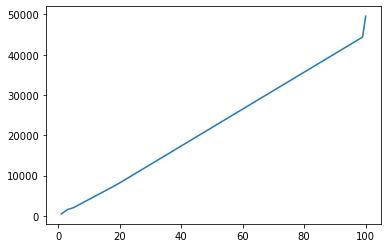

In [28]:
plt.plot(coverages, nt_fwhm)